# CE 256 - Group Project

Nia Jones, Kathie Xu, Wenxin Li, Joyce Chen, Zach Hoffman, Mathilde Pinel

# EV Charging Station Equity

### What are some policies that could be put in place to encourage equitable distribution of EV charging stations throughout the Bay Area and encourage EV ownership for Low-Income communities. 

Look at the existing charging network and assess the proximity of chargers to different communities
What is the current policy for EV charging infrastructure in the Bay Area?
What is the government's attitude?
Are there maps that exist with housing information (i.e. renters vs. homeowners) - this is important when factoring in people who have the option to buy a charger to have at home vs. people who do not have this option at all. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd 
import requests

## EV Charging data 

https://afdc.energy.gov/fuels/electricity_locations.html#/analyze?region=US-CA&country=US

In [3]:
df = pd.read_csv('alt_fuel_stations (Mar 6 2022).csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (6,16,20,33,43,49,52,57,58,60,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,PG&E - Grass Valley Service Center,788 Taylorville Rd,"Exit Highway 49 at McKnight Way, west 2 blocks...",Grass Valley,CA,95949,NaN,800-684-4648,E,...,NaN,NaN,NaN,NaN,Q,3000 3600,HD,NaN,NaN,NaN
1,CNG,United Parcel Service,4500 Norris Canyon Rd,"Exit I-680 at Crow Canyon Road, go west to San...",San Ramon,CA,94583,NaN,800-920-1166,E,...,NaN,NaN,NaN,NaN,Q,3000 3600,MD,NaN,NaN,NaN
2,CNG,PG&E - Santa Cruz Service Center,615 7th Ave,Exit Highway 17 to Highway 1 E toward Monterey...,Santa Cruz,CA,95062,NaN,800-684-4648,E,...,NaN,NaN,NaN,NaN,Q,3000 3600,LD,NaN,NaN,NaN
3,CNG,PG&E - Bakersfield Service Center,4101 Wible Rd,"Exit Highway 99 at White Land, go west to Wibl...",Bakersfield,CA,93313,NaN,800-684-4648,E,...,NaN,NaN,NaN,NaN,B,3000 3600,HD,NaN,NaN,NaN
4,CNG,PG&E - Fresno Service Center,3754 E California Ave,"From Highway 99 northbound, exit at E Jensen A...",Fresno,CA,93725,NaN,800-684-4648,E,...,NaN,NaN,NaN,NaN,B,3000 3600,HD,NaN,NaN,NaN


In [5]:
df.shape

(14292, 65)

In [6]:
df.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

In [7]:
ev_charging_stations = df[df['Fuel Type Code'] == 'ELEC']

In [8]:
#ev_charging_stations.head()

In [9]:
ev_charging_stations.shape

(13655, 65)

In [10]:
ev_charging_stations_position = ev_charging_stations[['Station Name', 'Street Address', 
                                                                          'City', 'State', 'ZIP', 'Latitude', 
                                                                          'Longitude']]

In [11]:
ev_charging_stations_position.reset_index(drop=True, inplace=True)

In [12]:
ev_charging_stations_position

,Station Name,Street Address,City,State,ZIP,Latitude,Longitude
0,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,34.040539,-118.271387
1,California Air Resources Board,9530 Telstar Ave,El Monte,CA,91731,34.068720,-118.064000
2,Scripps Green Hospital,10666 N Torrey Pines Rd,La Jolla,CA,92037,32.899470,-117.243000
3,Galpin Motors,15421 Roscoe Blvd,Sepulveda,CA,91343,34.221665,-118.468371
4,Galleria at Tyler,1299 Galleria at Tyler,Riverside,CA,92503,33.909914,-117.459053
...,...,...,...,...,...,...,...
13650,VUSD RHS RHS EVS#4,1001 W Main St,Visalia,CA,93291,36.327503,-119.301512
13651,VUSD RHS RHS EVS#2,1001 W Main St,Visalia,CA,93291,36.327501,-119.301624
13652,VUSD RHS RHS EVS#3,1001 W Main St,Visalia,CA,93291,36.327499,-119.301429
13653,UNITED NISSAN CUSTOMER FRONT,2361 CA-86,Imperial,CA,92251,32.823694,-115.570964


In [13]:
alameda_ev_charging = ev_charging_stations_position[(ev_charging_stations_position['Latitude'] <= 37.903408) & 
                                                   (ev_charging_stations_position['Latitude'] >= 37.448244) &
                                                   (ev_charging_stations_position['Longitude'] <= -121.554858) &
                                                   (ev_charging_stations_position['Longitude'] >= -122.333554)]

In [14]:
oakland_ev_charging = ev_charging_stations_position[ev_charging_stations_position['City'] == 'Oakland']

In [15]:
oakland_ev_charging[['Station Name']]

,Station Name
82,Oakland International Airport - Daily Lot
232,Oakland International Airport - Economy Lot
1268,Holiday Inn Express Hotel & Suites Oakland-Air...
1269,Signature Flight Support OAK - Oakland Int'l A...
1812,YMCA Garage-Ace
...,...
12391,Whole Foods Market
12444,Peralta College
12493,Laney College
12588,DENIZENAPTS DENIZEN2


## Census Data 

http://cenpy-devs.github.io/cenpy/generated/cenpy.products.ACS.html

In [16]:
import contextily
import geopandas
import cenpy

acs = cenpy.products.ACS(2017)

/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [17]:
acs.variables #is a pandas dataframe containing query-able vbls

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required,values
AIANHH,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN,NaN
AIHHTL,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN,NaN
AIRES,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN,NaN
ANRC,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN,NaN
B00001_001E,Estimate!!Total,UNWEIGHTED SAMPLE COUNT OF THE POPULATION,int,B00001,0,NaN,NaN,B00001_001EA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
UA,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN,NaN
ZCTA,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN,NaN
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN,NaN


In [18]:
vars_to_download = {
    "B02001_002E": "total_pop_white",     # Total white population
    "B02001_003E": "total_pop_black",     # Total black population
    "B03002_012E": "total_pop_hispanic",  # Total hispanic population
    "B03002_006E": "total_pop_asian",     # Total asian population
    "B15003_002E": "total_bachelor",      # Total w/ Bachelor degree
    "B25077_001E": "median_house_value",  # Median house value
    "B19013_001E": "median_hh_income",    # Median household income
    "B08303_001E": "tt_work",             # Aggregate travel time to work
    "B01003_001E": "total_pop"            # Total population
}
vars_to_download_l = list(vars_to_download.keys())

In [19]:
# Extracting census variables from CA
db = acs.from_msa("San Francisco, CA",
                  level="tract",
                  variables=vars_to_download_l
                 )

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [20]:
#db.head()

In [21]:
# Write a companion file with the names of each variable
var_names = acs.variables.reindex(vars_to_download)[["label", "concept"]].reset_index().rename(columns={"index": "var_id"})
var_names["short_name"] = var_names["var_id"].map(vars_to_download)

In [22]:
# Replace missing values with columns mean
filler = lambda col: col.fillna(col.mean())
db.loc[:, vars_to_download] = db.loc[:, vars_to_download].apply(filler)

In [23]:
# Replace variable codes with short names
db = db.rename(columns=vars_to_download)

In [24]:
# Calculate area in Sq.Km
db["area_sqm"] = db.to_crs(epsg=5070).area / 1e6

In [25]:
# Percentage with a Bachelor’s degree
db["pct_bachelor"] = db["total_bachelor"] / (db["total_pop"] + (db["total_pop"]==0) * 1)

In [26]:
# Percentage of white population
db["pct_white"] = db["total_pop_white"] / (db["total_pop"] + (db["total_pop"]==0) * 1)

In [27]:
# Percentage of black population
db["pct_black"] = db["total_pop_black"] / (db["total_pop"] + (db["total_pop"]==0) * 1)

In [28]:
# Percentage of hispanic population
db["pct_hispanic"] = db["total_pop_hispanic"] / (db["total_pop"] + (db["total_pop"]==0) * 1)

In [29]:
# Percentage of asian population
db["pct_asian"] = db["total_pop_asian"] / (db["total_pop"] + (db["total_pop"]==0) * 1)

In [30]:
db.head()

,GEOID,geometry,total_pop,total_pop_white,total_pop_black,total_pop_asian,total_pop_hispanic,tt_work,total_bachelor,median_hh_income,...,NAME,state,county,tract,area_sqm,pct_bachelor,pct_white,pct_black,pct_hispanic,pct_asian
0,06081613502,"POLYGON ((-13637607.210 4512223.630, -13637551...",6718.0,5621.0,0.0,312.0,1707.0,3201.0,73.0,143942.0,...,"Census Tract 6135.02, San Mateo County, Califo...",06,081,613502,26.380604,0.010866,0.836707,0.000000,0.254093,0.046442
1,06081603900,"POLYGON ((-13628669.480 4523997.580, -13628665...",5833.0,3737.0,146.0,1196.0,1404.0,3457.0,42.0,107140.0,...,"Census Tract 6039, San Mateo County, California",06,081,603900,1.985473,0.007200,0.640665,0.025030,0.240699,0.205040
2,06081605900,"POLYGON ((-13619131.300 4519518.460, -13619130...",5804.0,3431.0,130.0,1251.0,1557.0,3266.0,55.0,86563.0,...,"Census Tract 6059, San Mateo County, California",06,081,605900,0.773551,0.009476,0.591144,0.022398,0.268263,0.215541
3,06081607300,"POLYGON ((-13617014.450 4513568.760, -13617006...",3728.0,2637.0,0.0,793.0,466.0,1646.0,19.0,138929.0,...,"Census Tract 6073, San Mateo County, California",06,081,607300,1.294022,0.005097,0.707350,0.000000,0.125000,0.212715
4,06081609700,"POLYGON ((-13613517.680 4504617.730, -13613511...",4656.0,4035.0,56.0,203.0,364.0,2089.0,0.0,178542.0,...,"Census Tract 6097, San Mateo County, California",06,081,609700,5.418981,0.000000,0.866624,0.012027,0.078179,0.043600


(-13721135.3015, -13512403.228500001, 4437702.171499999, 4633818.7185)

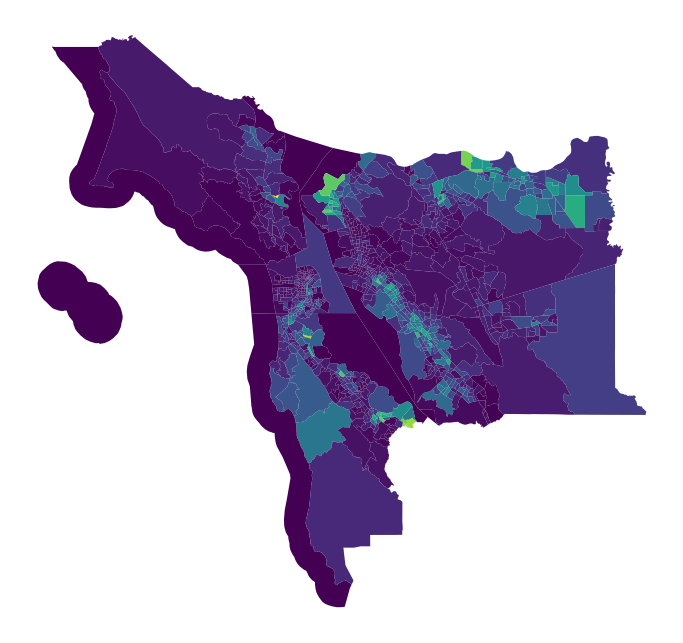

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
db.plot(column='total_pop_hispanic', ax=ax)
ax.axis('off')

In [32]:
# Extracting census variables from Oakland, CA
db_oakland = acs.from_place("Oakland, CA",
                  level="tract",
                  variables=vars_to_download_l
                 )

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Matched: Oakland, CA to Oakland city within layer Incorporated Places


In [33]:
db_emeryville = acs.from_place("Emeryville, CA",
                  level="tract",
                  variables=vars_to_download_l
                 )

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Matched: Emeryville, CA to Emeryville city within layer Incorporated Places


In [34]:
db_piedmont = acs.from_place("Piedmont, CA",
                  level="tract",
                  variables=vars_to_download_l
                 )

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Matched: Piedmont, CA to Piedmont city within layer Incorporated Places


In [35]:
db_sanleonardo = acs.from_place("San Leonardo, CA",
                  level="tract",
                  variables=vars_to_download_l
                 )

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Matched: San Leonardo, CA to San Bernardino city within layer Incorporated Places


In [36]:
db_concat = pd.concat([db_oakland, db_emeryville, db_piedmont, db_sanleonardo])

In [37]:
# Replace missing values with columns mean
filler = lambda col: col.fillna(col.mean())
db_oakland.loc[:, vars_to_download] = db_oakland.loc[:, vars_to_download].apply(filler)

In [38]:
# Replace variable codes with short names
db_oakland = db_oakland.rename(columns=vars_to_download)

In [39]:
# Calculate area in Sq.Km
db_oakland["area_sqm"] = db_oakland.to_crs(epsg=5070).area / 1e6

In [40]:
# Percentage of white population
db_oakland["pct_white"] = db_oakland["total_pop_white"] / (db_oakland["total_pop"] + (db_oakland["total_pop"]==0) * 1)

In [41]:
# Percentage of black population
db_oakland["pct_black"] = db_oakland["total_pop_black"] / (db_oakland["total_pop"] + (db_oakland["total_pop"]==0) * 1)

In [42]:
# Percentage of hispanic population
db_oakland["pct_hispanic"] = db_oakland["total_pop_hispanic"] / (db_oakland["total_pop"] + (db_oakland["total_pop"]==0) * 1)

In [43]:
# Percentage of asian population
db_oakland["pct_asian"] = db_oakland["total_pop_asian"] / (db_oakland["total_pop"] + (db_oakland["total_pop"]==0) * 1)

(-13615789.976, -13596549.304000001, 4540006.1105, 4558906.9595)

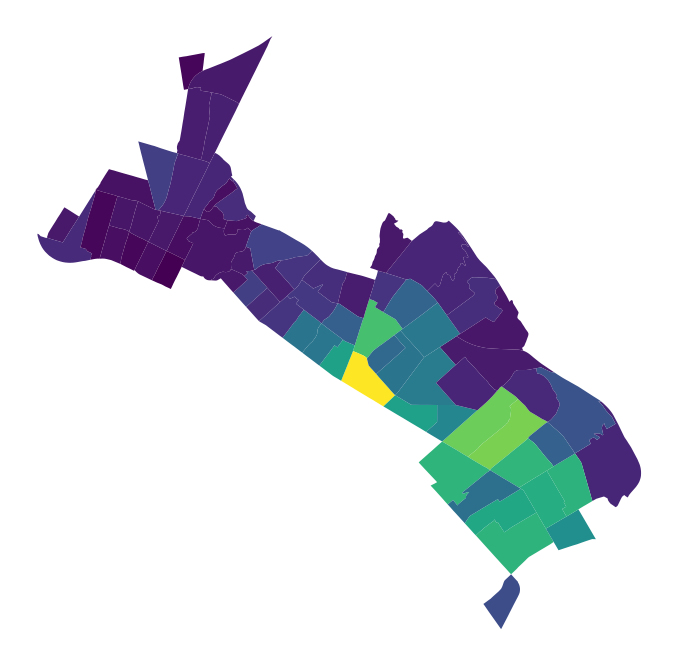

In [44]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
db_oakland.plot(column='total_pop_hispanic', ax=ax)
ax.axis('off')

## Trying to merge the data sets 

In [39]:
pip install mapclassify

Note: you may need to restart the kernel to use updated packages.


In [40]:
from shapely.geometry import Point
import mapclassify

In [41]:
first_point = Point(ev_charging_stations_position['Latitude'][0], ev_charging_stations_position['Longitude'][0])

In [42]:
ev_charging_stations_position['Lat_Lon'] = ev_charging_stations_position[['Latitude', 'Longitude']].apply(tuple, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
ev_charging_stations_position

,Station Name,Street Address,City,State,ZIP,Latitude,Longitude,Lat_Lon
0,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,34.040539,-118.271387,"(34.040539, -118.271387)"
1,California Air Resources Board,9530 Telstar Ave,El Monte,CA,91731,34.068720,-118.064000,"(34.06872, -118.064)"
2,Scripps Green Hospital,10666 N Torrey Pines Rd,La Jolla,CA,92037,32.899470,-117.243000,"(32.89947, -117.243)"
3,Galpin Motors,15421 Roscoe Blvd,Sepulveda,CA,91343,34.221665,-118.468371,"(34.221665, -118.468371)"
4,Galleria at Tyler,1299 Galleria at Tyler,Riverside,CA,92503,33.909914,-117.459053,"(33.909914, -117.459053)"
...,...,...,...,...,...,...,...,...
13650,VUSD RHS RHS EVS#4,1001 W Main St,Visalia,CA,93291,36.327503,-119.301512,"(36.327503, -119.301512)"
13651,VUSD RHS RHS EVS#2,1001 W Main St,Visalia,CA,93291,36.327501,-119.301624,"(36.327501, -119.301624)"
13652,VUSD RHS RHS EVS#3,1001 W Main St,Visalia,CA,93291,36.327499,-119.301429,"(36.327499, -119.301429)"
13653,UNITED NISSAN CUSTOMER FRONT,2361 CA-86,Imperial,CA,92251,32.823694,-115.570964,"(32.823694, -115.570964)"


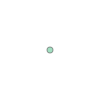

In [44]:
Point(ev_charging_stations_position['Lat_Lon'][0])

In [45]:
#ev_charing_in_geom = np.zeros((len(db)))

#for i in range(len(db)):
#    for j in range(len(ev_charging_stations_position)):
#        ev_charing_in_geom[i] = db['geometry'][i].contains(Point(ev_charging_stations_position['Lat_Lon'][j]))
    #print(ev_charing_in_geom[i])
    
#ev_charing_in_geom
#db['EV_charging'] =

In [46]:
ev_charging_stations_position['Lat_Lon']

0        (34.040539, -118.271387)
1            (34.06872, -118.064)
2            (32.89947, -117.243)
3        (34.221665, -118.468371)
4        (33.909914, -117.459053)
                   ...           
13650    (36.327503, -119.301512)
13651    (36.327501, -119.301624)
13652    (36.327499, -119.301429)
13653    (32.823694, -115.570964)
13654    (37.320192, -121.951522)
Name: Lat_Lon, Length: 13655, dtype: object

In [47]:
#len(ev_charing_in_geom)

Loading a shapefile of Oakland, Piedmont, Emeryville, San Leonardo

<AxesSubplot:>

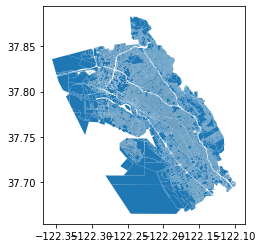

In [48]:
oakland_map = gpd.read_file('Parcel_Boundaries.shp')
oakland_map.plot()

In [49]:
# Adjusted using the Coordinate Reference System or CRS
#oakland_map.to_crs(epsg=4326).plot()

In [50]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(alameda_ev_charging["Longitude"], 
                                  alameda_ev_charging["Latitude"])]
geodata = gpd.GeoDataFrame(alameda_ev_charging, 
                          crs = crs, 
                          geometry = geometry)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Alameda County EV Charging Station')

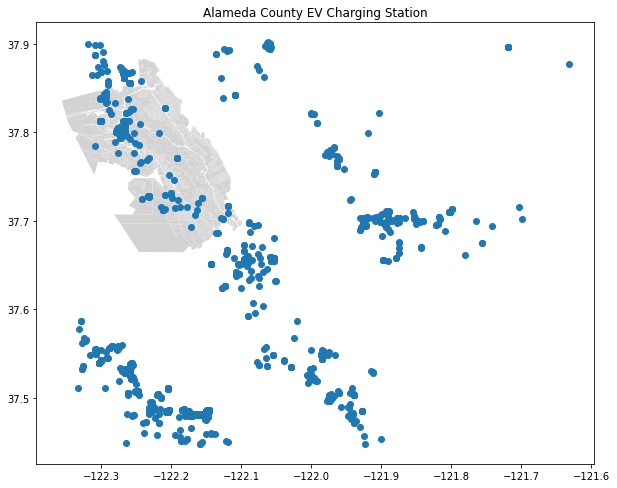

In [51]:
fig, ax = plt.subplots(figsize = (10,10))
oakland_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geodata.plot(ax=ax)
ax.set_title('Alameda County EV Charging Station')

In [52]:
geodata[geodata['City']=='Oakland']

,Station Name,Street Address,City,State,ZIP,Latitude,Longitude,geometry
82,Oakland International Airport - Daily Lot,1 Airport Dr,Oakland,CA,94621,37.713600,-122.208700,POINT (-122.20870 37.71360)
232,Oakland International Airport - Economy Lot,1 Airport Dr,Oakland,CA,94621,37.715300,-122.214500,POINT (-122.21450 37.71530)
1268,Holiday Inn Express Hotel & Suites Oakland-Air...,66 Airport Access Rd,Oakland,CA,94603,37.726036,-122.198798,POINT (-122.19880 37.72604)
1269,Signature Flight Support OAK - Oakland Int'l A...,8433 Earhart Rd,Oakland,CA,94621,37.729336,-122.208969,POINT (-122.20897 37.72934)
1812,YMCA Garage-Ace,2353 Webster St,Oakland,CA,94612,37.812679,-122.265068,POINT (-122.26507 37.81268)
...,...,...,...,...,...,...,...,...
12391,Whole Foods Market,230 Bay Pl,Oakland,CA,94612,37.813330,-122.260580,POINT (-122.26058 37.81333)
12444,Peralta College,333 E 8th St,Oakland,CA,94606,37.792468,-122.259155,POINT (-122.25916 37.79247)
12493,Laney College,900 Fallon St,Oakland,CA,94607,37.795402,-122.262753,POINT (-122.26275 37.79540)
12588,DENIZENAPTS DENIZEN2,2323 Valley St,Oakland,CA,94612,37.812626,-122.267860,POINT (-122.26786 37.81263)


In [53]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(oakland_ev_charging["Longitude"], 
                                  oakland_ev_charging["Latitude"])]
geodata = gpd.GeoDataFrame(oakland_ev_charging, 
                          crs = crs, 
                          geometry = geometry)

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Oakland EV Charging Station')

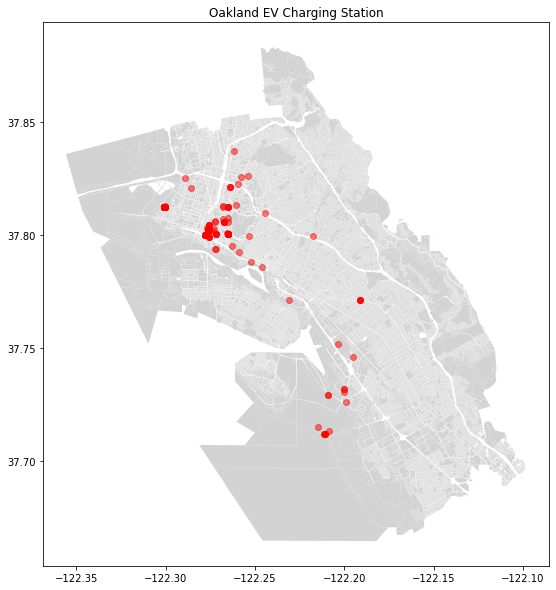

In [54]:
fig, ax = plt.subplots(figsize = (10,10))
oakland_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geodata.plot(ax=ax, color='r', alpha=0.5)
ax.set_title('Oakland EV Charging Station')

NameError: name 'plot' is not defined

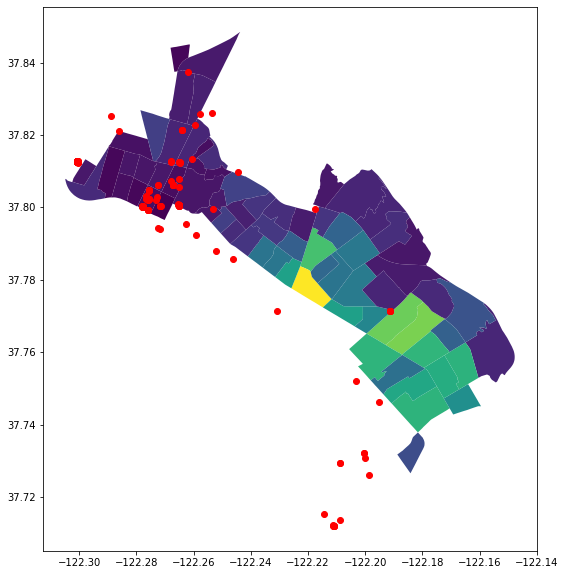

In [55]:
fig, ax = plt.subplots(figsize = (10,10))
db_oakland.to_crs(epsg=4326).plot(column='total_pop_hispanic', ax=ax)
geodata.plot(ax=ax, color='r')
fig.colorbar(plot);

In [56]:
for col in enumerate(vars_to_download.values()):
    print(col)

(0, 'total_pop_white')
(1, 'total_pop_black')
(2, 'total_pop_hispanic')
(3, 'total_pop_asian')
(4, 'total_bachelor')
(5, 'median_house_value')
(6, 'median_hh_income')
(7, 'tt_work')
(8, 'total_pop')


In [57]:
list(vars_to_download.values())[0:4]

['total_pop_white', 'total_pop_black', 'total_pop_hispanic', 'total_pop_asian']

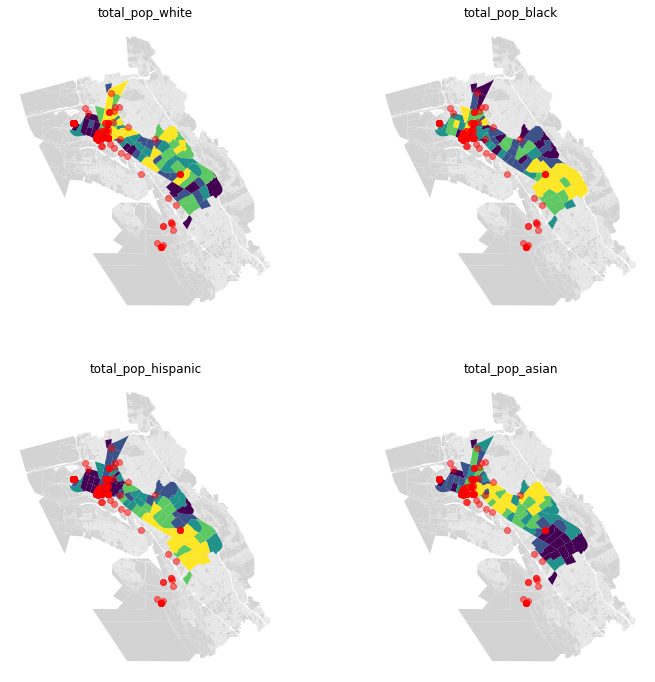

In [58]:
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(list(vars_to_download.values())[0:4]):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    oakland_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
    db_oakland.to_crs(epsg=4326).plot(column=col, ax=ax, scheme='Quantiles', 
            linewidth=0)
    geodata.plot(ax=ax, color='r', alpha=0.5)
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

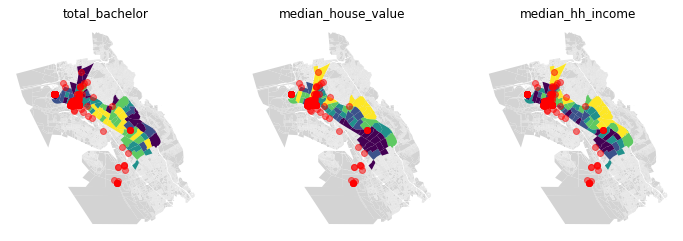

In [60]:
f, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(list(vars_to_download.values())[4:7]):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    oakland_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
    db_oakland.to_crs(epsg=4326).plot(column=col, ax=ax, scheme='Quantiles', 
            linewidth=0)
    geodata.plot(ax=ax, color='r', alpha=0.5)
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

## Principal Component Analysis

### Kmeans Clustering (Elbow Method) 

In [61]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import sklearn.cluster as cluster

In [127]:
# Selecting my cluster variables
db_short = db_oakland[['pct_white', 'pct_black', 'pct_asian', 'pct_hispanic', 
                       "median_house_value", "median_hh_income"]]

In [128]:
cluster_variables =  ['pct_white', 'pct_black', 'pct_asian', 'pct_hispanic', 
                       "median_house_value", "median_hh_income"]

In [129]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(db_short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [130]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,1.482551e+12
1,2,5.094198e+11
2,3,2.454573e+11
3,4,1.663302e+11
4,5,9.891374e+10
5,6,7.485750e+10
6,7,5.459927e+10
7,8,4.580529e+10
8,9,3.904926e+10
9,10,3.475679e+10


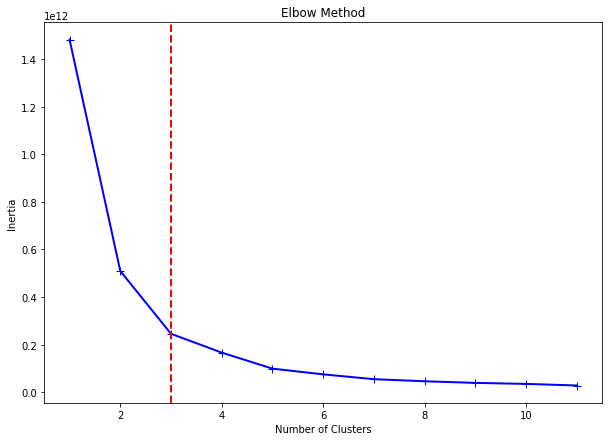

In [131]:
# Using elbow method to select the correct number of clusters
plt.figure(figsize = (10,7))
plt.plot(range(1,12), wss, linewidth = 2, color = 'blue', marker='+', markersize = 8)
plt.title('Elbow Method', fontsize = 12)
plt.xlabel('Number of Clusters',fontsize = 10)
plt.ylabel('Inertia',fontsize = 10)

n_clusters = 3

plt.axvline(x = n_clusters, linewidth = 2, color = 'red', linestyle = '--')
plt.show()

In [132]:
from esda.moran import Moran
import libpysal.weights.set_operations as Wsets
from libpysal.weights import Queen, KNN

In [133]:
w = Queen.from_dataframe(db_oakland)

In [134]:
w.islands

[]

In [135]:
# Set seed for reproducibility
np.random.seed(123456)
# Calculate Moran's I for each variable
mi_results = [Moran(db_oakland[variable], w) for variable in cluster_variables]
# Display on table
table = pd.DataFrame([(variable, res.I, res.p_sim) \
                          for variable,res \
                          in zip(cluster_variables, mi_results)
                         ], columns=['Variable', "Moran's I", 'P-value']
                        )\
              .set_index('Variable')
table

,Moran's I,P-value
Variable,,
pct_white,0.488649,0.001
pct_black,0.533990,0.001
pct_asian,0.510354,0.001
pct_hispanic,0.760892,0.001
median_house_value,0.556594,0.001
median_hh_income,0.412507,0.001


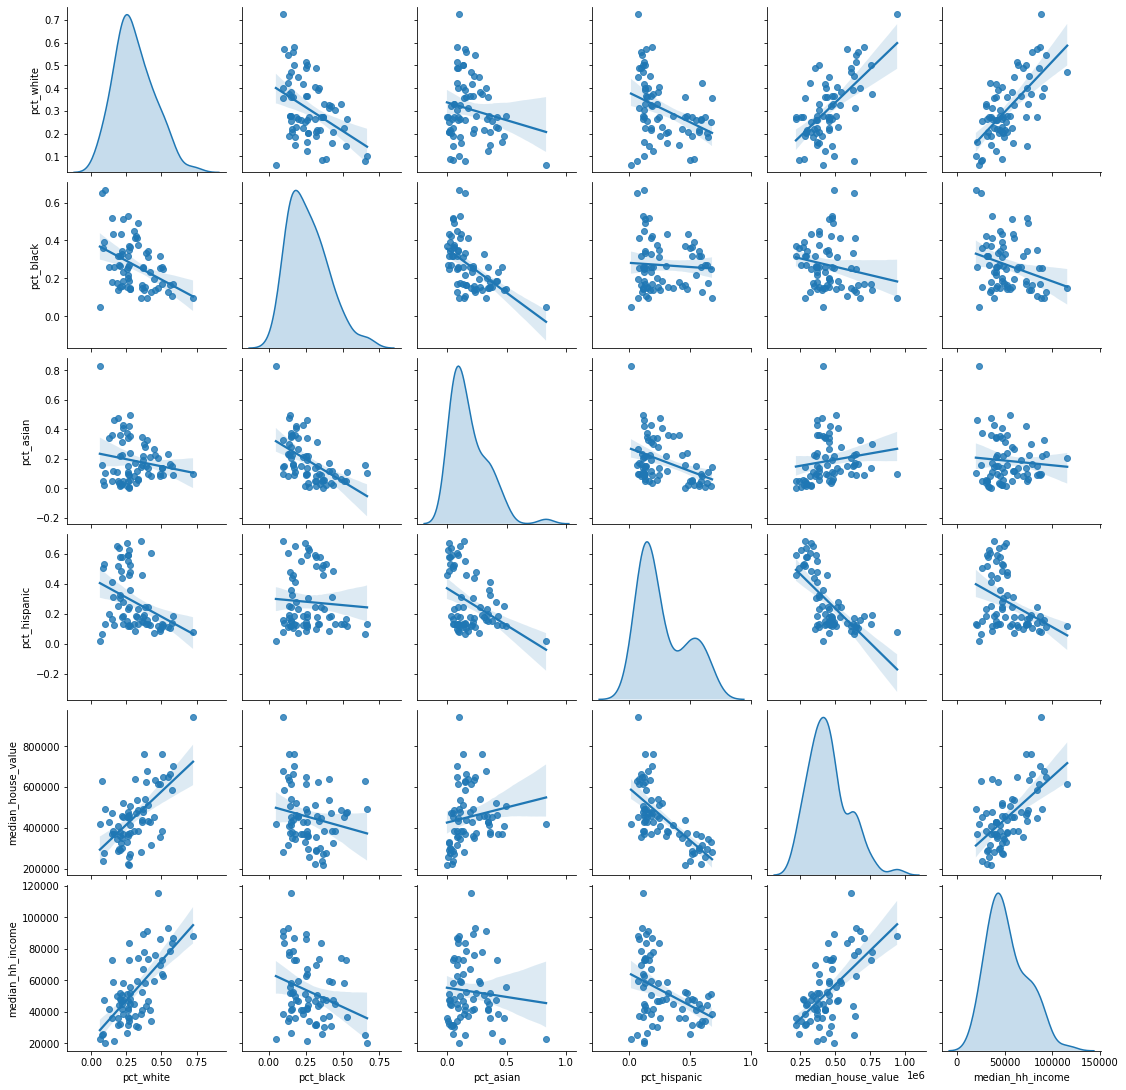

In [138]:
sns.pairplot(db_oakland[cluster_variables], kind='reg', diag_kind='kde')

In [139]:
cluster_variables_2 =  ['pct_white', 'pct_black', 'pct_asian', 'pct_hispanic']

In [140]:
# Initialise KMeans instance
kmeans = KMeans(n_clusters=4)

In [143]:
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k4cls = kmeans.fit(db_oakland[cluster_variables_2])

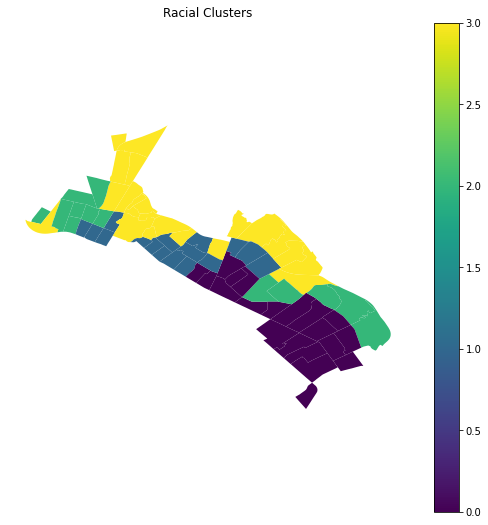

In [155]:
# Assign labels into a column
db_oakland['k4cls'] = k4cls.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
db_oakland.to_crs(epsg=4326).plot(column='k4cls', legend=True, linewidth=0, ax=ax)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'Racial Clusters in Oakland')
# Display the map
plt.show()

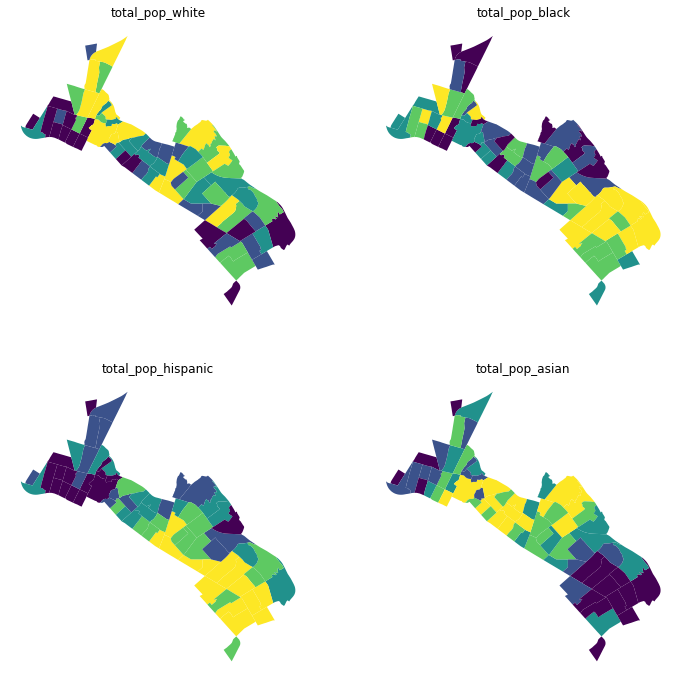

In [157]:
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(list(vars_to_download.values())[0:4]):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    db_oakland.to_crs(epsg=4326).plot(column=col, ax=ax, scheme='Quantiles', 
            linewidth=0)
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

In [158]:
# Group table by cluster label, keep the variables used for clustering, and obtain their mean
k4means = db_oakland.groupby('k4cls')[cluster_variables_2].mean()
k4means.T.round(3)

k4cls,0,1,2,3
pct_white,0.244,0.218,0.245,0.471
pct_black,0.268,0.190,0.479,0.205
pct_asian,0.078,0.409,0.092,0.176
pct_hispanic,0.559,0.213,0.163,0.140


0: pop hispanic
1: pop asian
2: pop black
3: pop white

In [159]:
# Group table by cluster label, keep the variables used for clustering, and obtain their descriptive summary
k4desc = db_oakland.groupby('k4cls')[cluster_variables_2].describe()
# Loop over each cluster and print a table with descriptives
for cluster in k4desc.T:
    print('\n\t---------\n\tCluster %i'%cluster)
    print(k4desc.T[cluster].unstack())


	---------
	Cluster 0
              count      mean       std       min       25%       50%  \
pct_white      20.0  0.244139  0.080887  0.086520  0.204646  0.256333   
pct_black      20.0  0.267696  0.097908  0.096687  0.173850  0.269024   
pct_asian      20.0  0.078242  0.072050  0.000000  0.022746  0.050084   
pct_hispanic   20.0  0.558521  0.074516  0.440555  0.499758  0.563525   

                   75%       max  
pct_white     0.273575  0.423755  
pct_black     0.348462  0.435480  
pct_asian     0.119425  0.241289  
pct_hispanic  0.608819  0.682899  

	---------
	Cluster 1
              count      mean       std       min       25%       50%  \
pct_white      16.0  0.218065  0.071314  0.062750  0.183993  0.220946   
pct_black      16.0  0.189614  0.066567  0.048908  0.149958  0.180446   
pct_asian      16.0  0.408651  0.131770  0.220807  0.345939  0.367952   
pct_hispanic   16.0  0.213391  0.103653  0.018148  0.144498  0.190842   

                   75%       max  
pct_white   

No handles with labels found to put in legend.


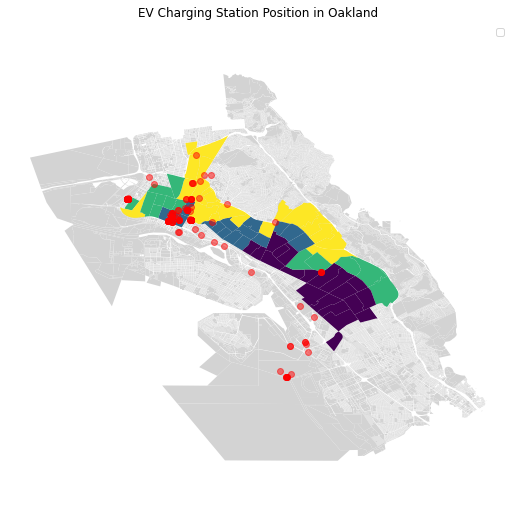

In [163]:
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
oakland_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
db_oakland.to_crs(epsg=4326).plot(column='k4cls', legend=False, linewidth=0, ax=ax)
geodata.plot(ax=ax, color='r', alpha=0.5)
# Remove axis
ax.set_axis_off()
# Keep axes proportionate
plt.axis('equal')
# Add title
plt.title(r'EV Charging Station Position in Oakland')
# Add legend
plt.legend()
# Display the map
plt.show()